##### Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.  
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

download Dataset for Predict load eligibilty Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("loan_approval.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.shape

(614, 13)

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [11]:
df.groupby('Loan_Status').count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,187,192,186,192,183,192,192,181,186,179,192
Y,414,419,413,422,399,422,422,411,414,385,422


In [12]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

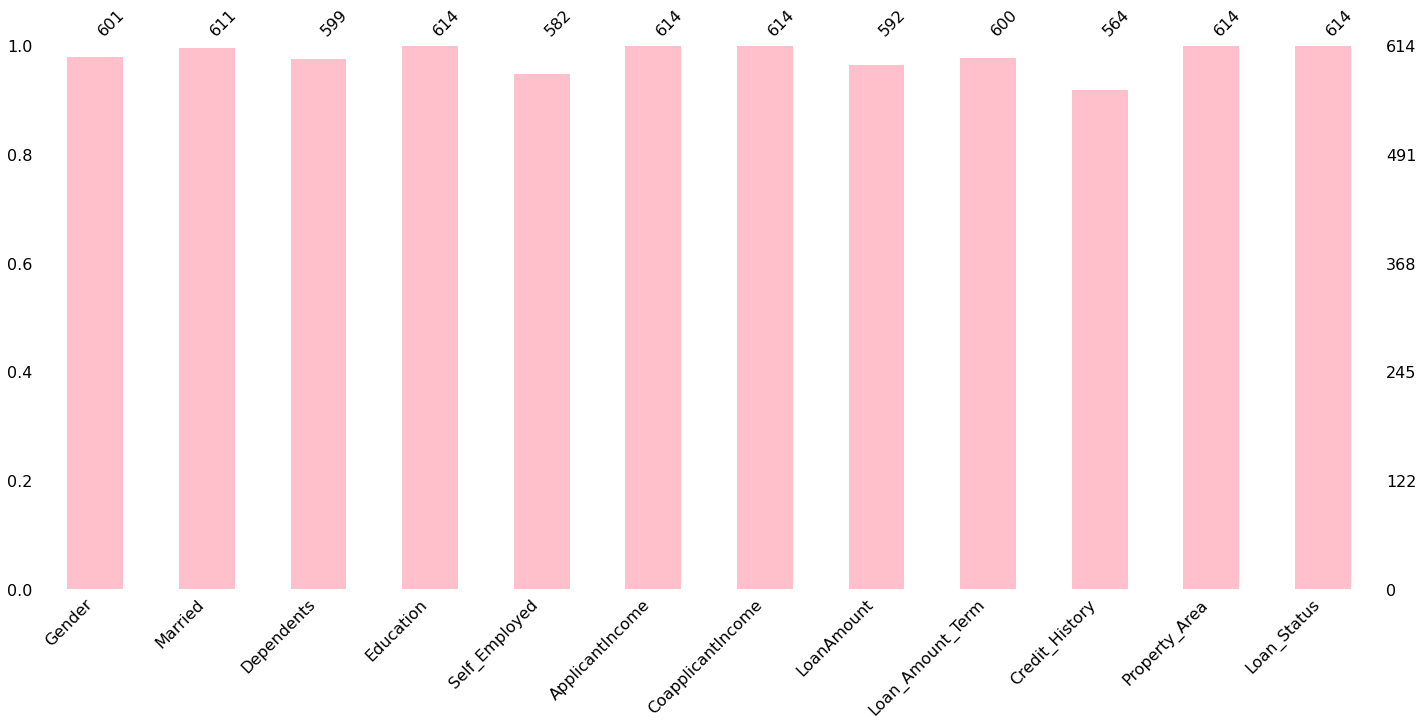

In [13]:
import missingno as msno
msno.bar(df,color="pink")

In [18]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
for col in categorical_columns:
    df[col].fillna(df[col].value_counts().index[0],inplace=True)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in numerical_columns:
    df[col].fillna(df[col].median(),inplace=True)

In [19]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

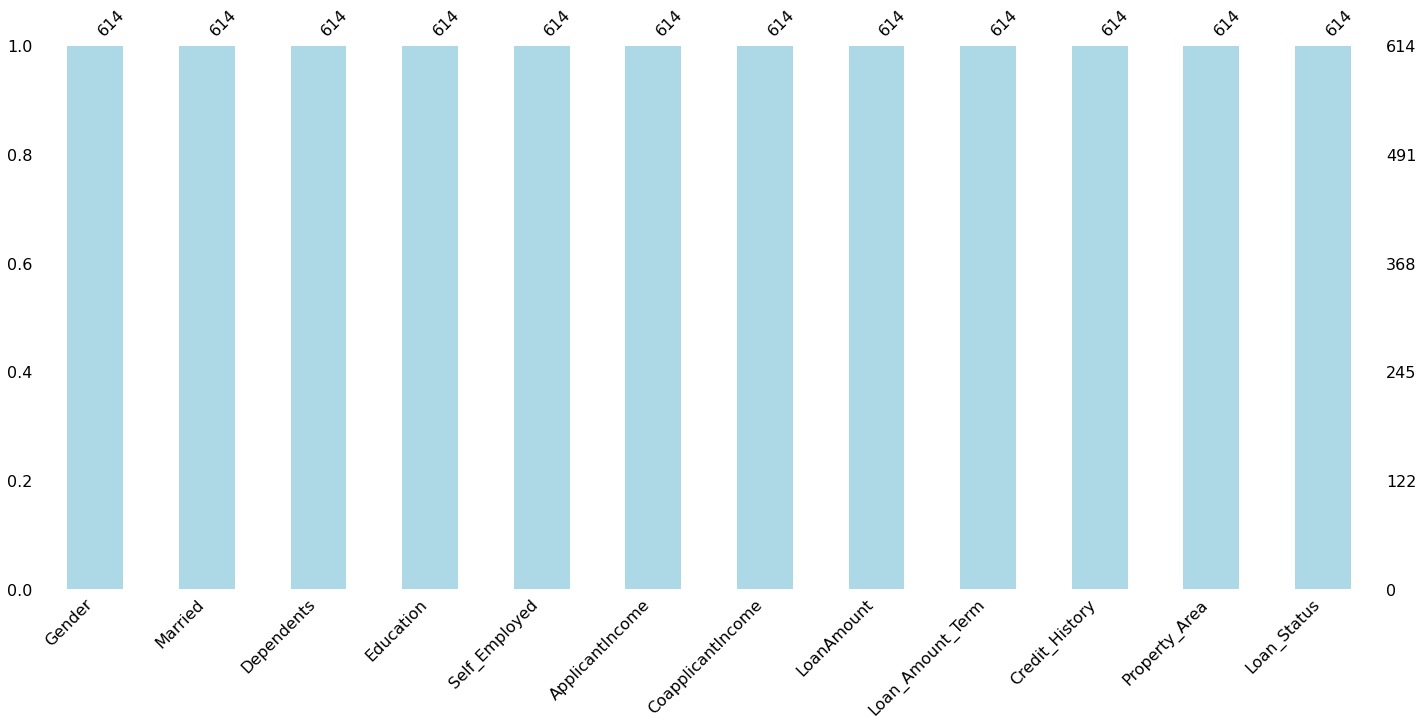

In [20]:
msno.bar(df,color="lightblue")

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Data Visualization

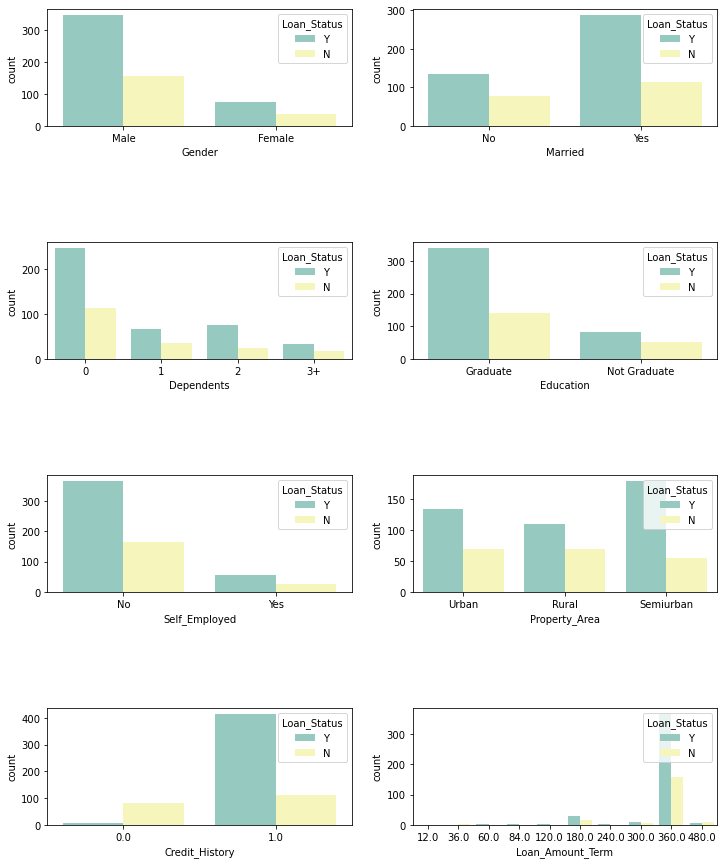

In [22]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col],palette="Set3")

plt.subplots_adjust(hspace=1)

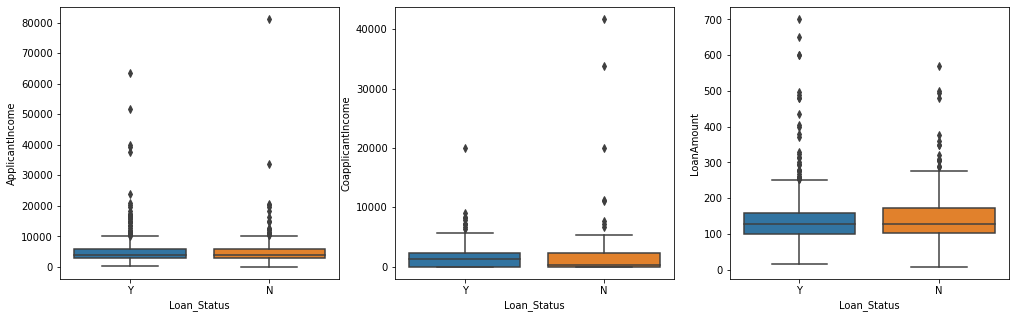

In [23]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])
plt.subplots_adjust(hspace=1)

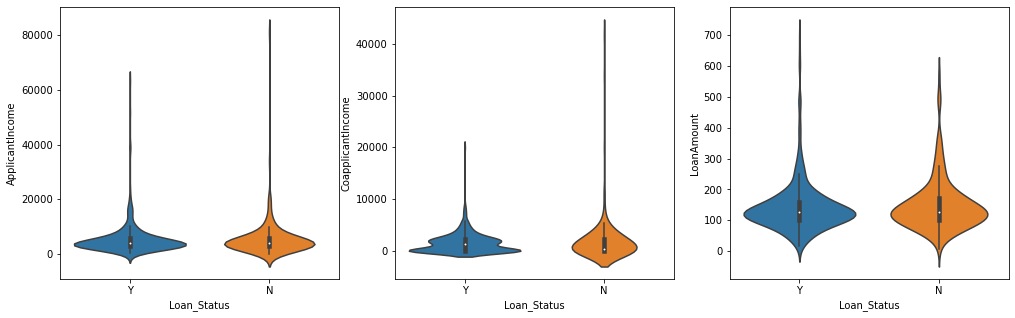

In [24]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.violinplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])
plt.subplots_adjust(hspace=1)

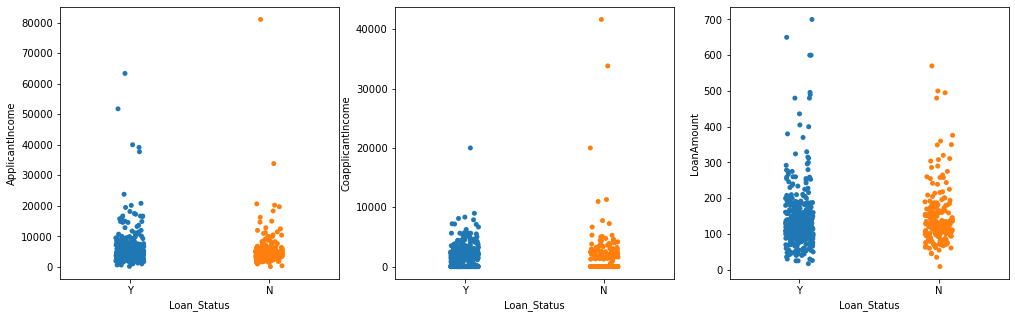

In [25]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.stripplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])
plt.subplots_adjust(hspace=1)

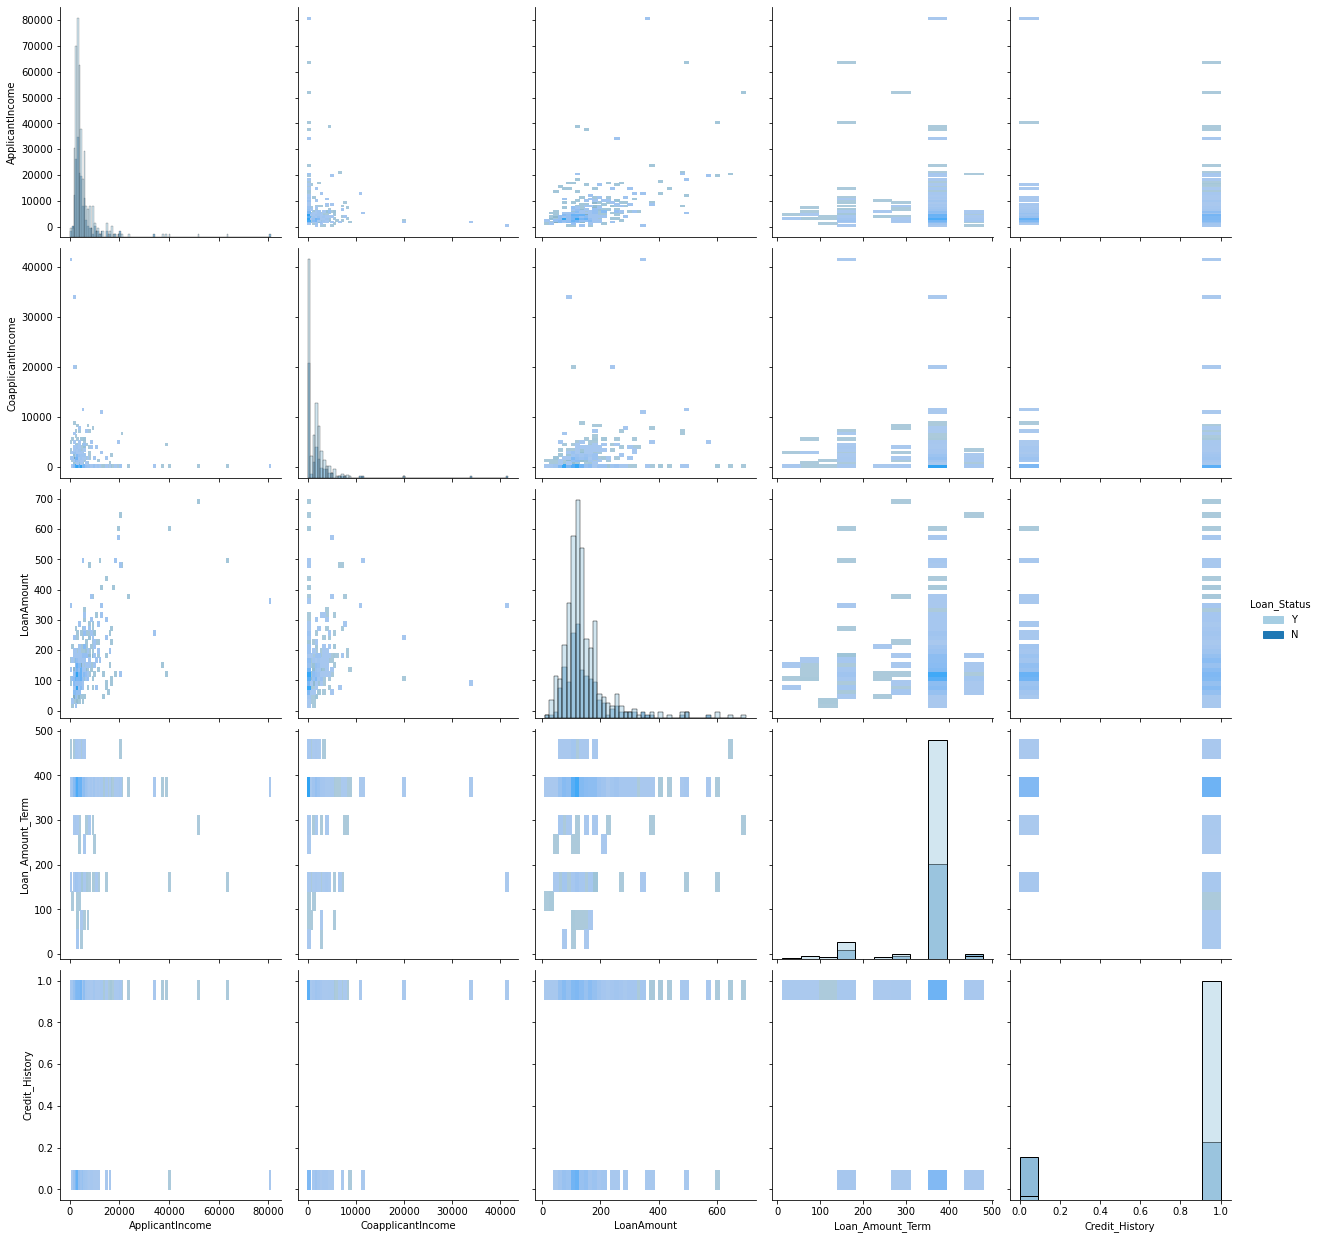

In [26]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Loan_Status',height=3.5,kind='hist')
plt.show()

### Data Preprocessing

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()

In [35]:
class_val =[]
for c in categorical_columns:
    df[c]=label_encoder.fit_transform(df[c])
    class_val.append({col :label_encoder.classes_})

In [36]:
class_val

[{1: array([0, 1])},
 {1: array([0, 1])},
 {1: array([0, 1, 2, 3])},
 {1: array([0, 1])},
 {1: array([0, 1])},
 {1: array([0, 1, 2])},
 {1: array([0, 1], dtype=int64)},
 {1: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)}]

In [37]:
for c in categorical_columns:
    print(f'{c}:{df[c].unique()}')

Gender:[1 0]
Married:[0 1]
Dependents:[0 1 2 3]
Education:[0 1]
Self_Employed:[0 1]
Property_Area:[2 0 1]
Credit_History:[1 0]
Loan_Amount_Term:[8 4 6 5 2 7 9 1 3 0]


In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,8,1,2,Y
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0,N
2,1,1,0,0,1,3000,0.0,66.0,8,1,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2,Y
4,1,0,0,0,0,6000,0.0,141.0,8,1,2,Y


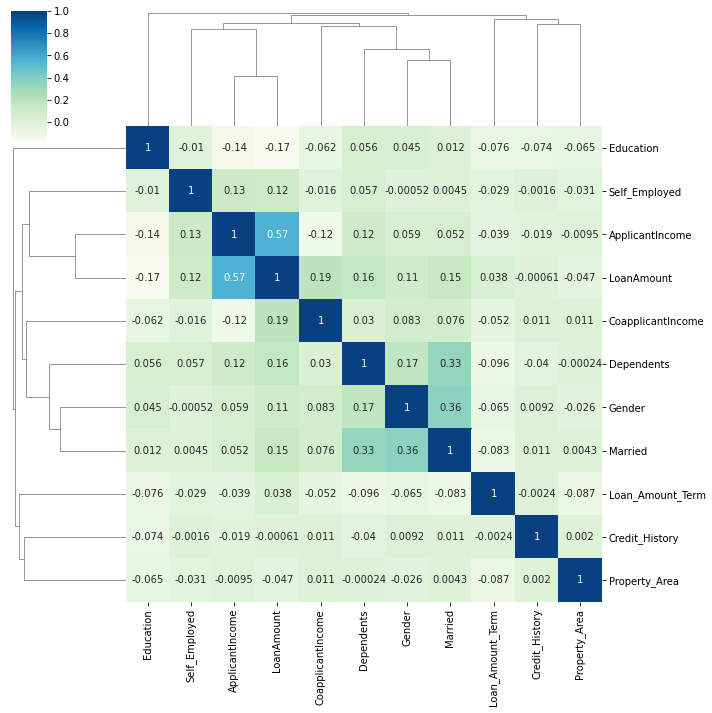

In [44]:

sns.clustermap(df.corr(),annot=True,cmap='GnBu')

<AxesSubplot:>

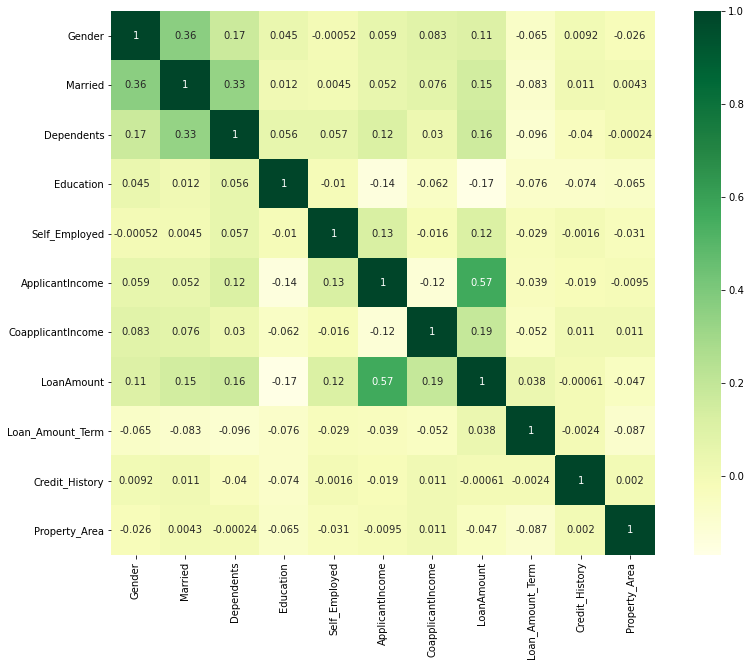

In [42]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGn',square=True)

### Dataset Splitting

In [48]:
label_encoder = LabelEncoder()
df.Loan_Status= label_encoder.fit_transform(df.Loan_Status)
df.Loan_Status.unique()


array([1, 0])

In [49]:
label_encoder.classes_


array(['N', 'Y'], dtype=object)

In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,8,1,2,1


In [51]:
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [52]:
x[:5]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,8,1,2
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2
4,1,0,0,0,0,6000,0.0,141.0,8,1,2


In [53]:
y[:5]

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state =42)

### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)


In [57]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))


Training Data Set Accuracy:  1.0


In [58]:
print("Training Data F1 Score ", f1_score(y_train,y_pred))

Training Data F1 Score  1.0


In [59]:
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())

Validation Mean F1 Score:  0.6387571933722345


In [60]:
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Validation Mean Accuracy:  0.6903731189445474


[Text(153.45000000000002, 190.26, 'X[9] <= 0.5\ngini = 0.431\nsamples = 491\nvalue = [154, 337]'),
 Text(83.7, 135.9, 'X[7] <= 488.0\ngini = 0.163\nsamples = 67\nvalue = [61, 6]'),
 Text(55.800000000000004, 81.53999999999999, 'X[6] <= 8115.0\ngini = 0.14\nsamples = 66\nvalue = [61, 5]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.116\nsamples = 65\nvalue = [61, 4]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 135.9, 'X[6] <= 9537.0\ngini = 0.342\nsamples = 424\nvalue = [93, 331]'),
 Text(167.4, 81.53999999999999, 'X[5] <= 3357.5\ngini = 0.337\nsamples = 420\nvalue = [90, 330]'),
 Text(139.5, 27.180000000000007, 'gini = 0.253\nsamples = 155\nvalue = [23, 132]'),
 Text(195.3, 27.180000000000007, 'gini = 0.378\nsamples = 265\nvalue = [67, 198]'),
 Text(279.0, 81.53999999999999, 'X[7] <= 171.0\ngini = 0.375\nsamples = 4\nvalue = [3

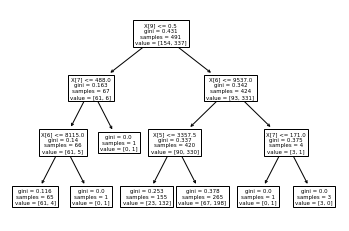

In [61]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
tree.plot_tree(tree_clf)

In [62]:
text_representation = tree.export_text(tree_clf)

print(text_representation)

|--- feature_9 <= 0.50
|   |--- feature_7 <= 488.00
|   |   |--- feature_6 <= 8115.00
|   |   |   |--- class: 0
|   |   |--- feature_6 >  8115.00
|   |   |   |--- class: 1
|   |--- feature_7 >  488.00
|   |   |--- class: 1
|--- feature_9 >  0.50
|   |--- feature_6 <= 9537.00
|   |   |--- feature_5 <= 3357.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  3357.50
|   |   |   |--- class: 1
|   |--- feature_6 >  9537.00
|   |   |--- feature_7 <= 171.00
|   |   |   |--- class: 1
|   |   |--- feature_7 >  171.00
|   |   |   |--- class: 0



In [65]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


### ROC Curve 

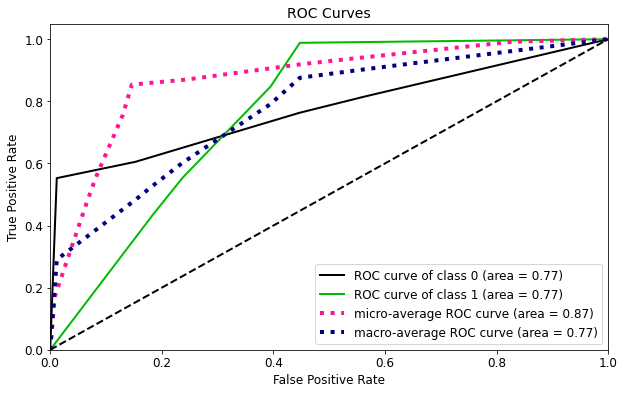

In [66]:
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Precision Recall Curve

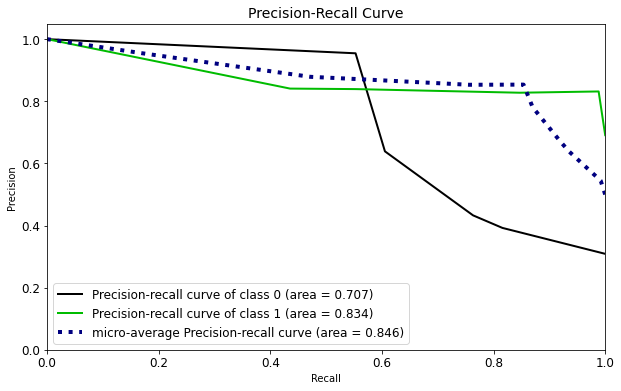

In [67]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Learning Curve

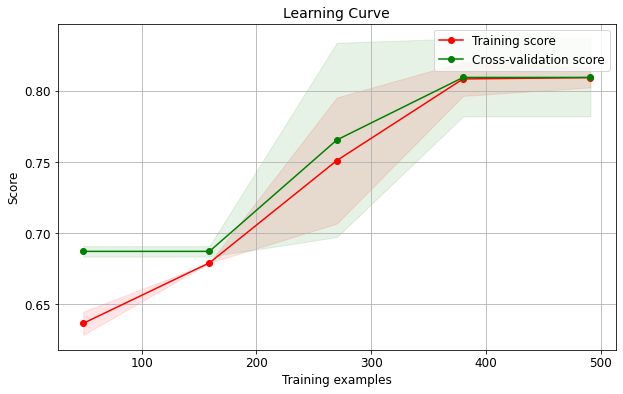

In [70]:
skplt.estimators.plot_learning_curve(tree_clf, x,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Lift Curve

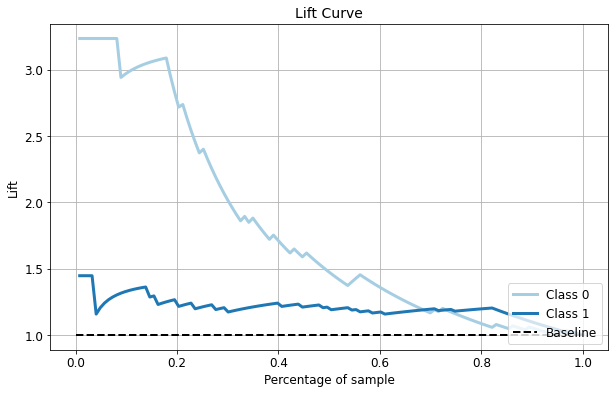

In [71]:
 skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Cumulative Gains Curve

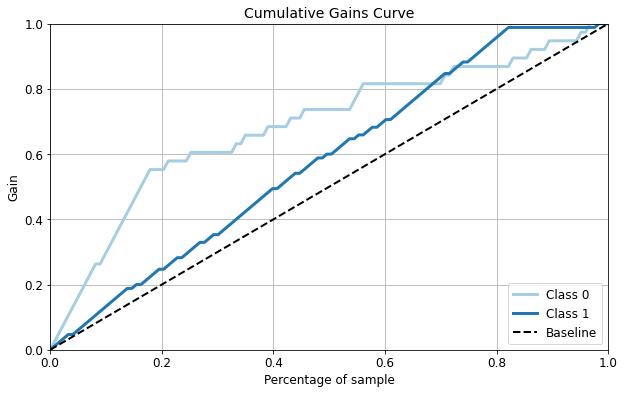

In [72]:
skplt.metrics.plot_cumulative_gain(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


### Confusion Matrix

In [73]:
confusion_matrix(y_test, y_pred)

array([[21, 17],
       [ 1, 84]], dtype=int64)

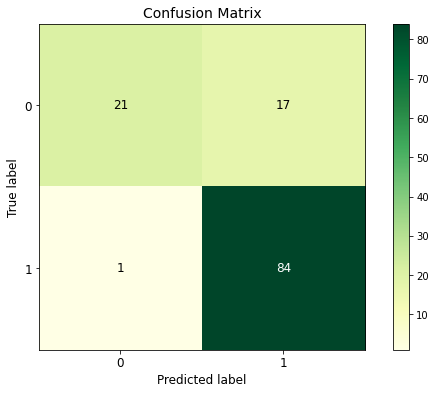

In [74]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.YlGn)
plt.show()

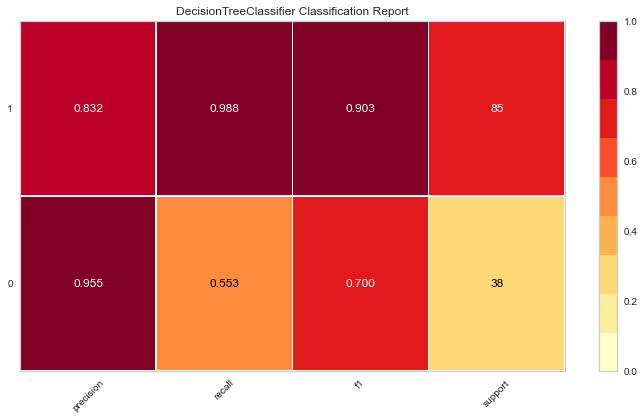

In [83]:
import yellowbrick as yb
plt.figure(figsize=(10,6))
visualizer = yb.classifier.classification_report(tree_clf, X_train, y_train, X_test, y_test,  support=True)
visualizer.show()
plt.show()